# model1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import zipfile

extracted_dir = '/content/dataSPLIT20renamed'
zip_file_path = '/content/drive/My Drive/dataSPLIT20renamed.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from tensorflow.keras.layers import Flatten

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from tensorflow.keras.layers import Flatten


train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_datagen.flow_from_directory(
    '/content/dataSPLIT20renamed/dataSPLIT20renamed/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = valid_datagen.flow_from_directory(
    '/content/dataSPLIT20renamed/dataSPLIT20renamed/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/dataSPLIT20renamed/dataSPLIT20renamed/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


model1 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model1.trainable = False
x = model1.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(20, activation='softmax')(x)

model1 = Model(inputs=model1.input, outputs=predictions)
model1.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

model_path = f'/content/model1res.keras'

callbacks = [
    ModelCheckpoint(
        filepath=model_path,
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1,
        mode='max'
    ),
    EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        verbose=1,
        mode='max',
        restore_best_weights=True
    )
]


history1 = model1.fit(
    train_generator,
    callbacks = callbacks,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)



Found 2436 images belonging to 20 classes.
Found 531 images belonging to 20 classes.
Found 532 images belonging to 20 classes.
Epoch 1/50
76/76 [==============================] - ETA: 0s - loss: 4.5334 - accuracy: 0.0616
Epoch 1: val_accuracy improved from -inf to 0.10156, saving model to /content/model1res.keras
76/76 [==============================] - 28s 317ms/step - loss: 4.5334 - accuracy: 0.0616 - val_loss: 2.9390 - val_accuracy: 0.1016
Epoch 2/50
76/76 [==============================] - ETA: 0s - loss: 4.0651 - accuracy: 0.0811
Epoch 2: val_accuracy improved from 0.10156 to 0.19531, saving model to /content/model1res.keras
76/76 [==============================] - 14s 178ms/step - loss: 4.0651 - accuracy: 0.0811 - val_loss: 2.6704 - val_accuracy: 0.1953
Epoch 3/50
76/76 [==============================] - ETA: 0s - loss: 3.7836 - accuracy: 0.0957
Epoch 3: val_accuracy improved from 0.19531 to 0.27734, saving model to /content/model1res.keras
76/76 [==============================] 

In [ ]:
from tensorflow.keras.models import load_model

model1_loaded = load_model('/content/model1res.keras')

17/17 [==============================] - 5s 239ms/step


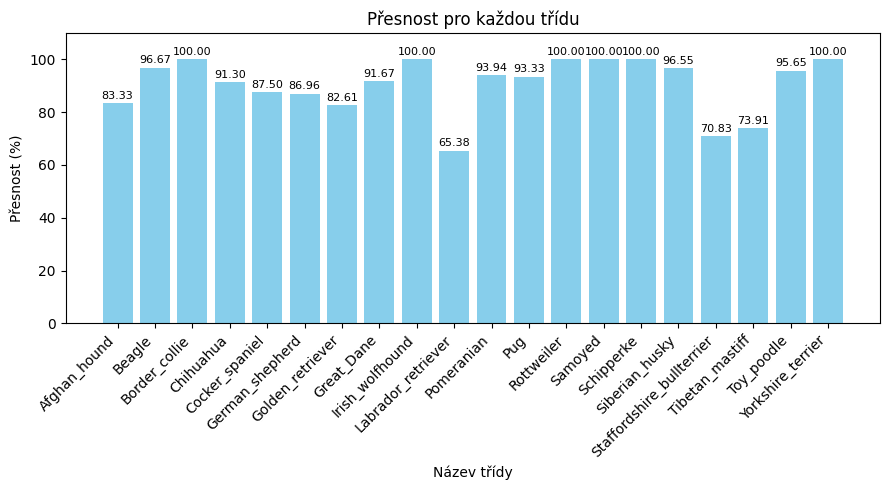

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_generator.reset()

validation_steps = np.ceil(test_generator.samples / test_generator.batch_size)

predictions = model1_loaded.predict(test_generator, steps=validation_steps)
y_pred = np.argmax(predictions, axis=1)

y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

class_accuracy = 100 * np.diag(cm) / np.sum(cm, axis=1)

class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(9, 5))
bars = plt.bar(class_names, class_accuracy, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 1, f"{yval:.2f}", va='bottom', ha='center', fontsize=8)

plt.xlabel('Název třídy')
plt.ylabel('Přesnost (%)')
plt.xticks(rotation=45, ha='right')
plt.title('Přesnost pro každou třídu')
plt.ylim(0, max(class_accuracy) + 10)
plt.tight_layout()
plt.show()

17/17 [==============================] - 3s 158ms/step


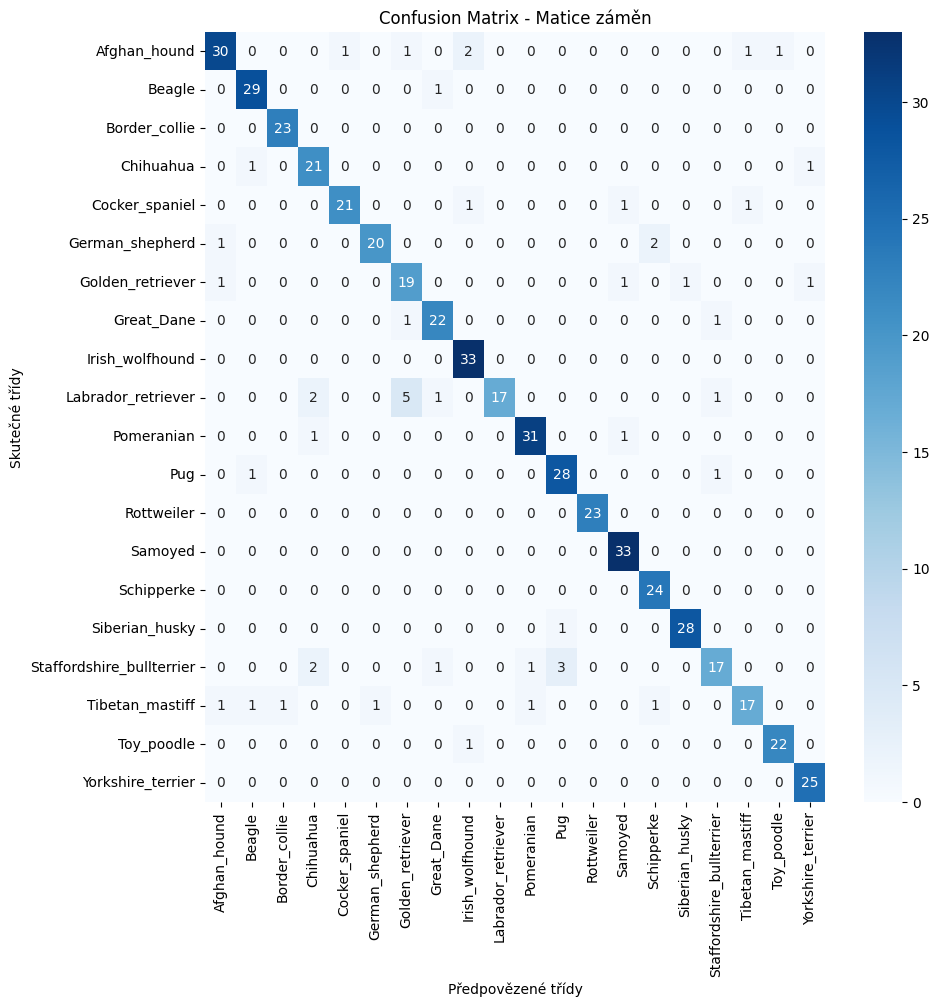

In [ ]:
predictions = model1_loaded.predict(test_generator, steps=np.ceil(test_generator.samples / test_generator.batch_size))
y_pred = np.argmax(predictions, axis=1)

y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Předpovězené třídy')
plt.ylabel('Skutečné třídy')
plt.title('Confusion Matrix - Matice záměn')
plt.show()

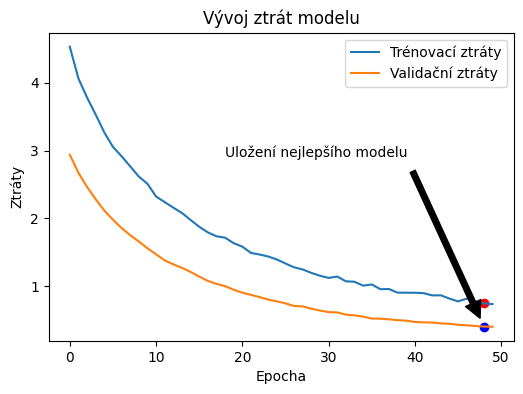

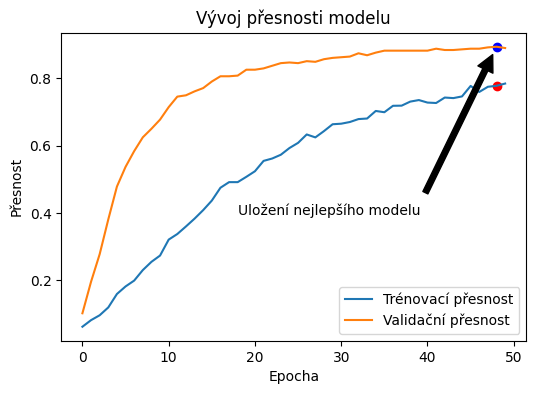

In [ ]:
import matplotlib.pyplot as plt

best_epoch = 48
best_loss = history1.history['loss'][best_epoch]
best_val_loss = history1.history['val_loss'][best_epoch]


plt.figure(figsize=(6, 4))
plt.plot(history1.history['loss'], label='Trénovací ztráty')
plt.plot(history1.history['val_loss'], label='Validační ztráty')
plt.scatter(best_epoch, best_loss, color='red')
plt.scatter(best_epoch, best_val_loss, color='blue')
plt.title('Vývoj ztrát modelu')
plt.ylabel('Ztráty')
plt.xlabel('Epocha')
plt.legend(loc='upper right')


plt.annotate('Uložení nejlepšího modelu', xy=(best_epoch, best_val_loss), xytext=(best_epoch-30, best_val_loss+2.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


best_accuracy = history1.history['accuracy'][best_epoch]
best_val_accuracy = history1.history['val_accuracy'][best_epoch]

plt.figure(figsize=(6, 4))
plt.plot(history1.history['accuracy'], label='Trénovací přesnost')
plt.plot(history1.history['val_accuracy'], label='Validační přesnost')
plt.scatter(best_epoch, best_accuracy, color='red')
plt.scatter(best_epoch, best_val_accuracy, color='blue')
plt.title('Vývoj přesnosti modelu')
plt.ylabel('Přesnost')
plt.xlabel('Epocha')
plt.legend(loc='lower right')


plt.annotate('Uložení nejlepšího modelu', xy=(best_epoch, best_val_accuracy), xytext=(best_epoch-30, best_val_accuracy-0.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


# model2

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    zoom_range = 0.2,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    horizontal_flip=True,
    fill_mode='constant'
)


valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    '/content/dataSPLIT20renamed/dataSPLIT20renamed/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = valid_datagen.flow_from_directory(
    '/content/dataSPLIT20renamed/dataSPLIT20renamed/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    '/content/dataSPLIT20renamed/dataSPLIT20renamed/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(20, activation='softmax')(x)

model2 = Model(inputs=base_model.input, outputs=predictions)
model2.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

model2_path = f'/content/model2res.keras'

callbacks = [
    ModelCheckpoint(
        filepath=model2_path,
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1,
        mode='max'
    ),
    EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        verbose=1,
        mode='max',
        restore_best_weights=True
    )
]


history2 = model2.fit(
    train_generator,
    callbacks = callbacks,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=70,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Found 2436 images belonging to 20 classes.
Found 531 images belonging to 20 classes.
Found 532 images belonging to 20 classes.
Epoch 1/70
76/76 [==============================] - ETA: 0s - loss: 4.4564 - accuracy: 0.0549
Epoch 1: val_accuracy improved from -inf to 0.10156, saving model to /content/model2res.keras
76/76 [==============================] - 41s 483ms/step - loss: 4.4564 - accuracy: 0.0549 - val_loss: 3.0404 - val_accuracy: 0.1016
Epoch 2/70
76/76 [==============================] - ETA: 0s - loss: 4.0690 - accuracy: 0.0761
Epoch 2: val_accuracy improved from 0.10156 to 0.17773, saving model to /content/model2res.keras
76/76 [==============================] - 36s 470ms/step - loss: 4.0690 - accuracy: 0.0761 - val_loss: 2.7615 - val_accuracy: 0.1777
Epoch 3/70
76/76 [==============================] - ETA: 0s - loss: 3.7438 - accuracy: 0.0836
Epoch 3: val_accuracy improved from 0.17773 to 0.25195, saving model to /content/model2res.keras
76/76 [==============================] 

In [ ]:
from tensorflow.keras.models import load_model

model2_loaded = load_model('/content/model2res.keras')

17/17 [==============================] - 3s 120ms/step


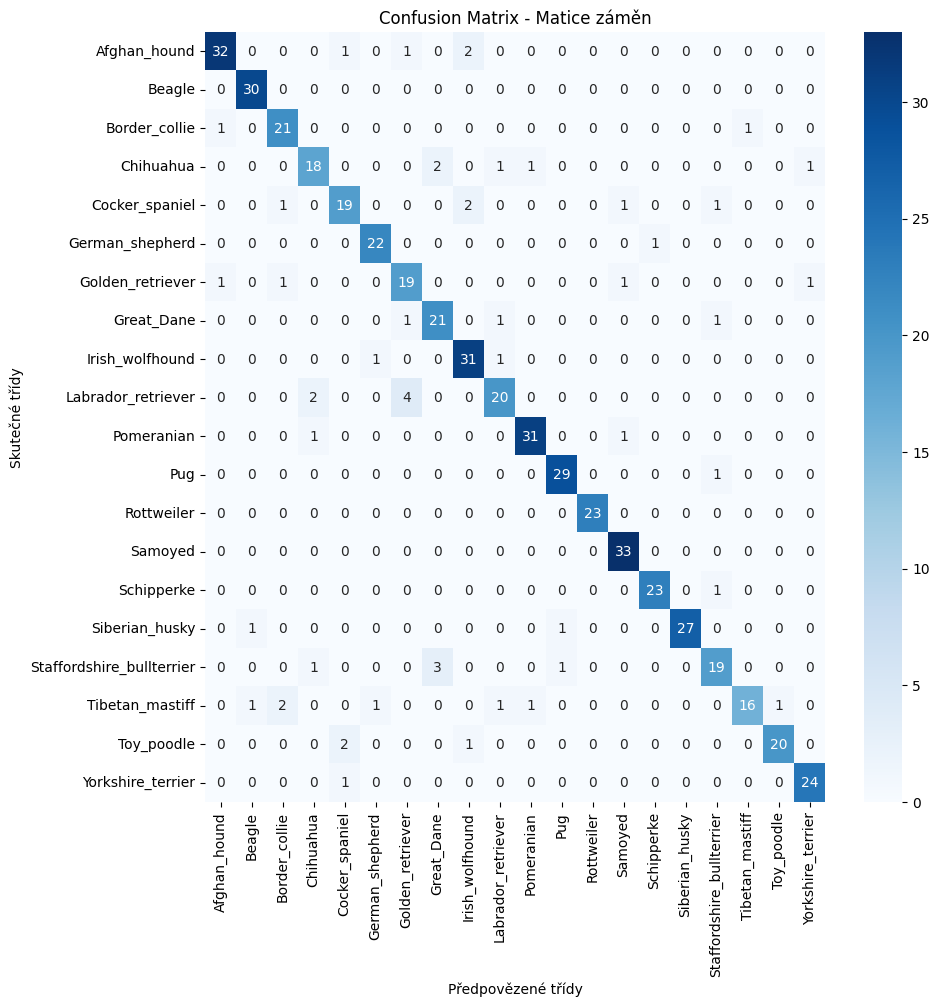

In [ ]:
predictions = model2_loaded.predict(test_generator, steps=np.ceil(test_generator.samples / test_generator.batch_size))
y_pred = np.argmax(predictions, axis=1)

y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Předpovězené třídy')
plt.ylabel('Skutečné třídy')
plt.title('Confusion Matrix - Matice záměn')
plt.show()

17/17 [==============================] - 2s 137ms/step


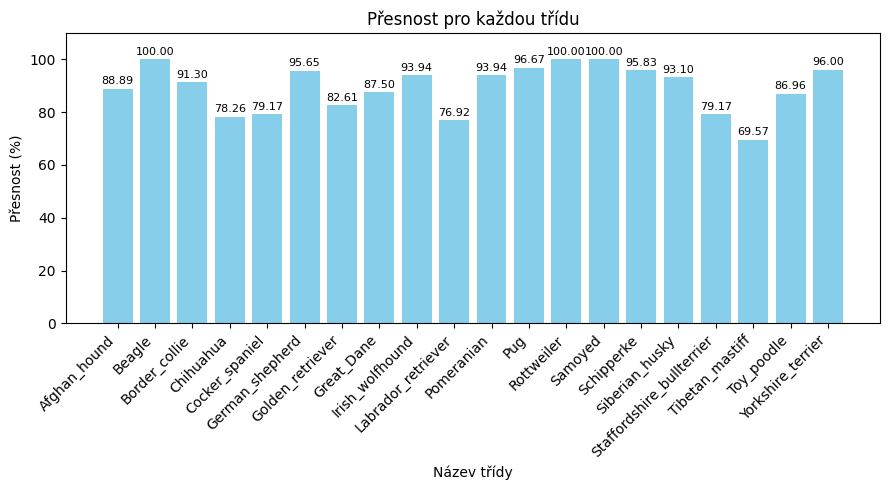

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_generator.reset()

validation_steps = np.ceil(test_generator.samples / test_generator.batch_size)

predictions = model2_loaded.predict(test_generator, steps=validation_steps)
y_pred = np.argmax(predictions, axis=1)

y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

class_accuracy = 100 * np.diag(cm) / np.sum(cm, axis=1)

class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(9, 5))
bars = plt.bar(class_names, class_accuracy, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 1, f"{yval:.2f}", va='bottom', ha='center', fontsize=8)

plt.xlabel('Název třídy')
plt.ylabel('Přesnost (%)')
plt.xticks(rotation=45, ha='right')
plt.title('Přesnost pro každou třídu')
plt.ylim(0, max(class_accuracy) + 10)
plt.tight_layout()
plt.show()

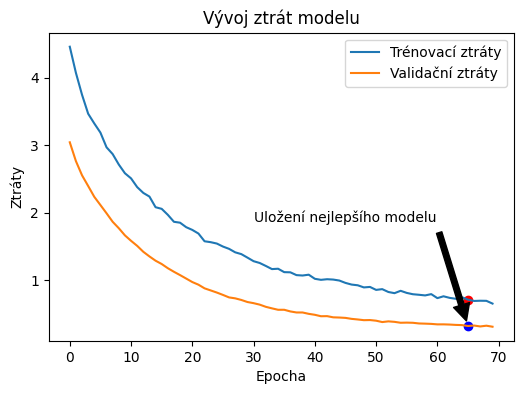

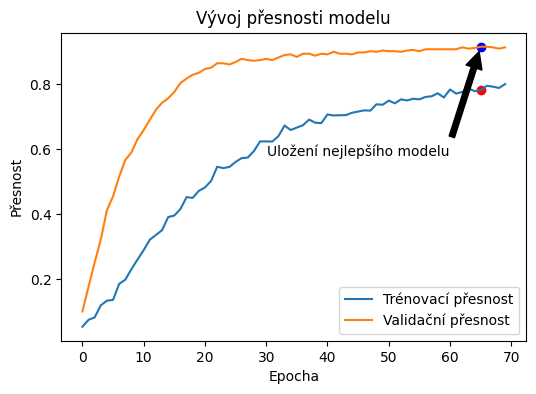

In [ ]:
import matplotlib.pyplot as plt


best_epoch = 65
best_loss = history2.history['loss'][best_epoch]
best_val_loss = history2.history['val_loss'][best_epoch]


plt.figure(figsize=(6, 4))
plt.plot(history2.history['loss'], label='Trénovací ztráty')
plt.plot(history2.history['val_loss'], label='Validační ztráty')
plt.scatter(best_epoch, best_loss, color='red')
plt.scatter(best_epoch, best_val_loss, color='blue')
plt.title('Vývoj ztrát modelu')
plt.ylabel('Ztráty')
plt.xlabel('Epocha')
plt.legend(loc='upper right')


plt.annotate('Uložení nejlepšího modelu', xy=(best_epoch, best_val_loss),
             xytext=(best_epoch-20, best_val_loss+1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center', va='bottom')

plt.show()

best_accuracy = history2.history['accuracy'][best_epoch]
best_val_accuracy = history2.history['val_accuracy'][best_epoch]

plt.figure(figsize=(6, 4))
plt.plot(history2.history['accuracy'], label='Trénovací přesnost')
plt.plot(history2.history['val_accuracy'], label='Validační přesnost')
plt.scatter(best_epoch, best_accuracy, color='red')
plt.scatter(best_epoch, best_val_accuracy, color='blue')
plt.title('Vývoj přesnosti modelu')
plt.ylabel('Přesnost')
plt.xlabel('Epocha')
plt.legend(loc='lower right')


plt.annotate('Uložení nejlepšího modelu', xy=(best_epoch, best_val_accuracy),
             xytext=(best_epoch-20, best_val_accuracy-0.30),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center', va='top')

plt.show()


# Model3

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
model3 = tf.keras.models.clone_model(model2_loaded)
model3.set_weights(model2_loaded.get_weights())

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    zoom_range = 0.2,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    horizontal_flip=True,
    fill_mode='constant'
)


valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    '/content/dataSPLIT20renamed/dataSPLIT20renamed/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = valid_datagen.flow_from_directory(
    '/content/dataSPLIT20renamed/dataSPLIT20renamed/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    '/content/dataSPLIT20renamed/dataSPLIT20renamed/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)




for layer in model3.layers[-15:]:
    layer.trainable = True

model3.compile(optimizer=Adam(learning_rate=0.000005), loss='categorical_crossentropy', metrics=['accuracy'])
model3_path = f'/content/model3res.keras'

callbacks = [
    ModelCheckpoint(
        filepath=model3_path,
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1,
        mode='max'
    ),
    EarlyStopping(
        monitor='val_accuracy',
        patience=20,
        verbose=1,
        mode='max',
        restore_best_weights=True
    )
]

history_finetune = model3.fit(
    train_generator,
    callbacks = callbacks,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Found 2436 images belonging to 20 classes.
Found 531 images belonging to 20 classes.
Found 532 images belonging to 20 classes.
Epoch 1/40
76/76 [==============================] - ETA: 0s - loss: 0.7749 - accuracy: 0.7708
Epoch 1: val_accuracy improved from -inf to 0.90234, saving model to /content/model3res.keras
76/76 [==============================] - 43s 504ms/step - loss: 0.7749 - accuracy: 0.7708 - val_loss: 0.3357 - val_accuracy: 0.9023
Epoch 2/40
76/76 [==============================] - ETA: 0s - loss: 0.7744 - accuracy: 0.7725
Epoch 2: val_accuracy improved from 0.90234 to 0.90625, saving model to /content/model3res.keras
76/76 [==============================] - 36s 479ms/step - loss: 0.7744 - accuracy: 0.7725 - val_loss: 0.3394 - val_accuracy: 0.9062
Epoch 3/40
76/76 [==============================] - ETA: 0s - loss: 0.6861 - accuracy: 0.7991
Epoch 3: val_accuracy improved from 0.90625 to 0.91016, saving model to /content/model3res.keras
76/76 [==============================] 

In [ ]:
from tensorflow.keras.models import load_model

model3_loaded = load_model('/content/model3res.keras')

17/17 [==============================] - 3s 121ms/step


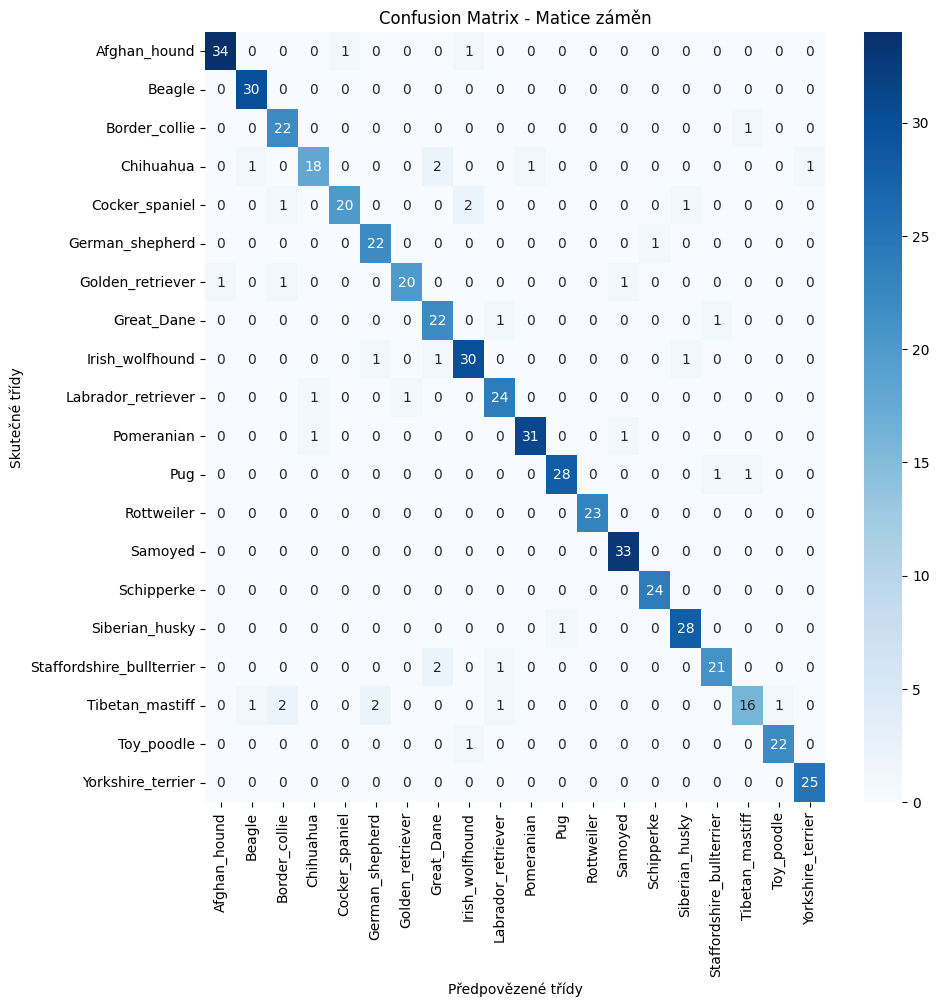

In [ ]:
predictions = model3_loaded.predict(test_generator, steps=np.ceil(test_generator.samples / test_generator.batch_size))
y_pred = np.argmax(predictions, axis=1)

y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Předpovězené třídy')
plt.ylabel('Skutečné třídy')
plt.title('Confusion Matrix - Matice záměn')
plt.show()

17/17 [==============================] - 2s 117ms/step


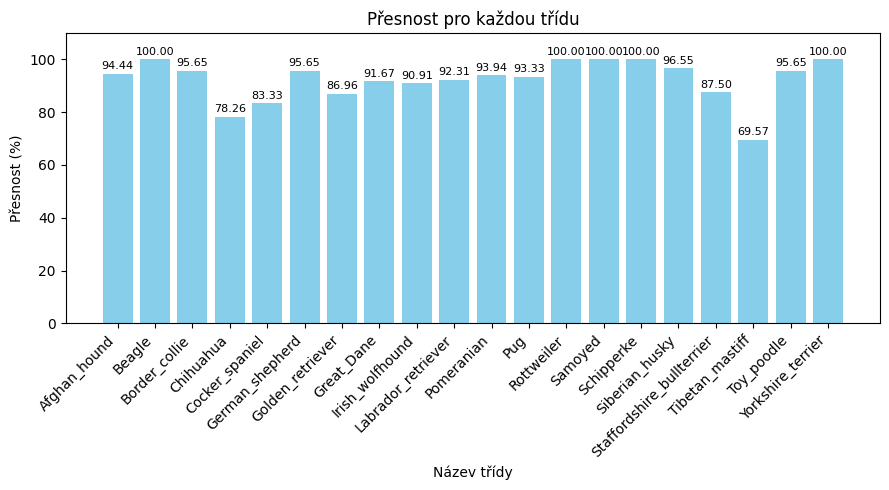

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_generator.reset()

validation_steps = np.ceil(test_generator.samples / test_generator.batch_size)

predictions = model3_loaded.predict(test_generator, steps=validation_steps)
y_pred = np.argmax(predictions, axis=1)

y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

class_accuracy = 100 * np.diag(cm) / np.sum(cm, axis=1)

class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(9, 5))
bars = plt.bar(class_names, class_accuracy, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 1, f"{yval:.2f}", va='bottom', ha='center', fontsize=8)

plt.xlabel('Název třídy')
plt.ylabel('Přesnost (%)')
plt.xticks(rotation=45, ha='right')
plt.title('Přesnost pro každou třídu')
plt.ylim(0, max(class_accuracy) + 10)
plt.tight_layout()
plt.show()

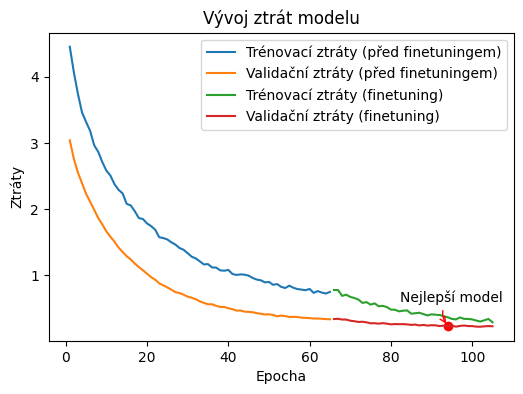

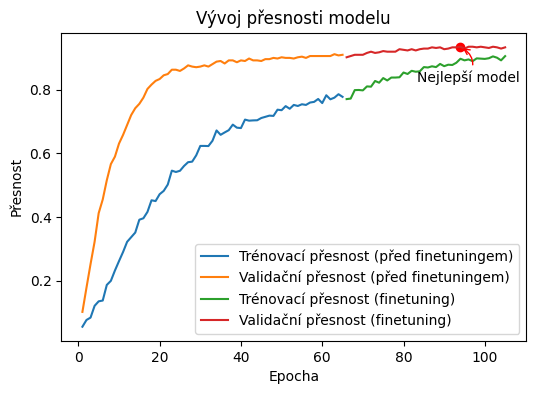

In [ ]:
import matplotlib.pyplot as plt
g
end_epoch_history2 = 65
epochs_history2 = range(1, end_epoch_history2 + 1)
epochs_history_finetune = range(end_epoch_history2 + 1, end_epoch_history2 + 1 + len(history_finetune.history['accuracy']))


best_finetune_epoch = 94
best_finetune_index = best_finetune_epoch - end_epoch_history2 - 1

plt.figure(figsize=(6, 4))
plt.plot(epochs_history2, history2.history['loss'][:end_epoch_history2], label='Trénovací ztráty (před finetuningem)')
plt.plot(epochs_history2, history2.history['val_loss'][:end_epoch_history2], label='Validační ztráty (před finetuningem)')
plt.plot(epochs_history_finetune, history_finetune.history['loss'], label='Trénovací ztráty (finetuning)')
plt.plot(epochs_history_finetune, history_finetune.history['val_loss'], label='Validační ztráty (finetuning)')
plt.scatter(best_finetune_epoch, history_finetune.history['val_loss'][best_finetune_index], color='red')
plt.annotate('Nejlepší model', xy=(best_finetune_epoch, history_finetune.history['val_loss'][best_finetune_index]),
             xytext=(best_finetune_epoch + 1, history_finetune.history['val_loss'][best_finetune_index] + 0.315),
             textcoords="data", ha='center', va='bottom', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.5', color='red'))
plt.title('Vývoj ztrát modelu')
plt.ylabel('Ztráty')
plt.xlabel('Epocha')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(epochs_history2, history2.history['accuracy'][:end_epoch_history2], label='Trénovací přesnost (před finetuningem)')
plt.plot(epochs_history2, history2.history['val_accuracy'][:end_epoch_history2], label='Validační přesnost (před finetuningem)')
plt.plot(epochs_history_finetune, history_finetune.history['accuracy'], label='Trénovací přesnost (finetuning)')
plt.plot(epochs_history_finetune, history_finetune.history['val_accuracy'], label='Validační přesnost (finetuning)')
plt.scatter(best_finetune_epoch, history_finetune.history['val_accuracy'][best_finetune_index], color='red')
plt.annotate('Nejlepší model', xy=(best_finetune_epoch, history_finetune.history['val_accuracy'][best_finetune_index]),
             xytext=(best_finetune_epoch + 2, history_finetune.history['val_accuracy'][best_finetune_index] - 0.12),
             textcoords="data", ha='center', va='bottom', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.5', color='red'))
plt.title('Vývoj přesnosti modelu')
plt.ylabel('Přesnost')
plt.xlabel('Epocha')
plt.legend(loc='lower right')
plt.show()

17/17 [==============================] - 2s 138ms/step


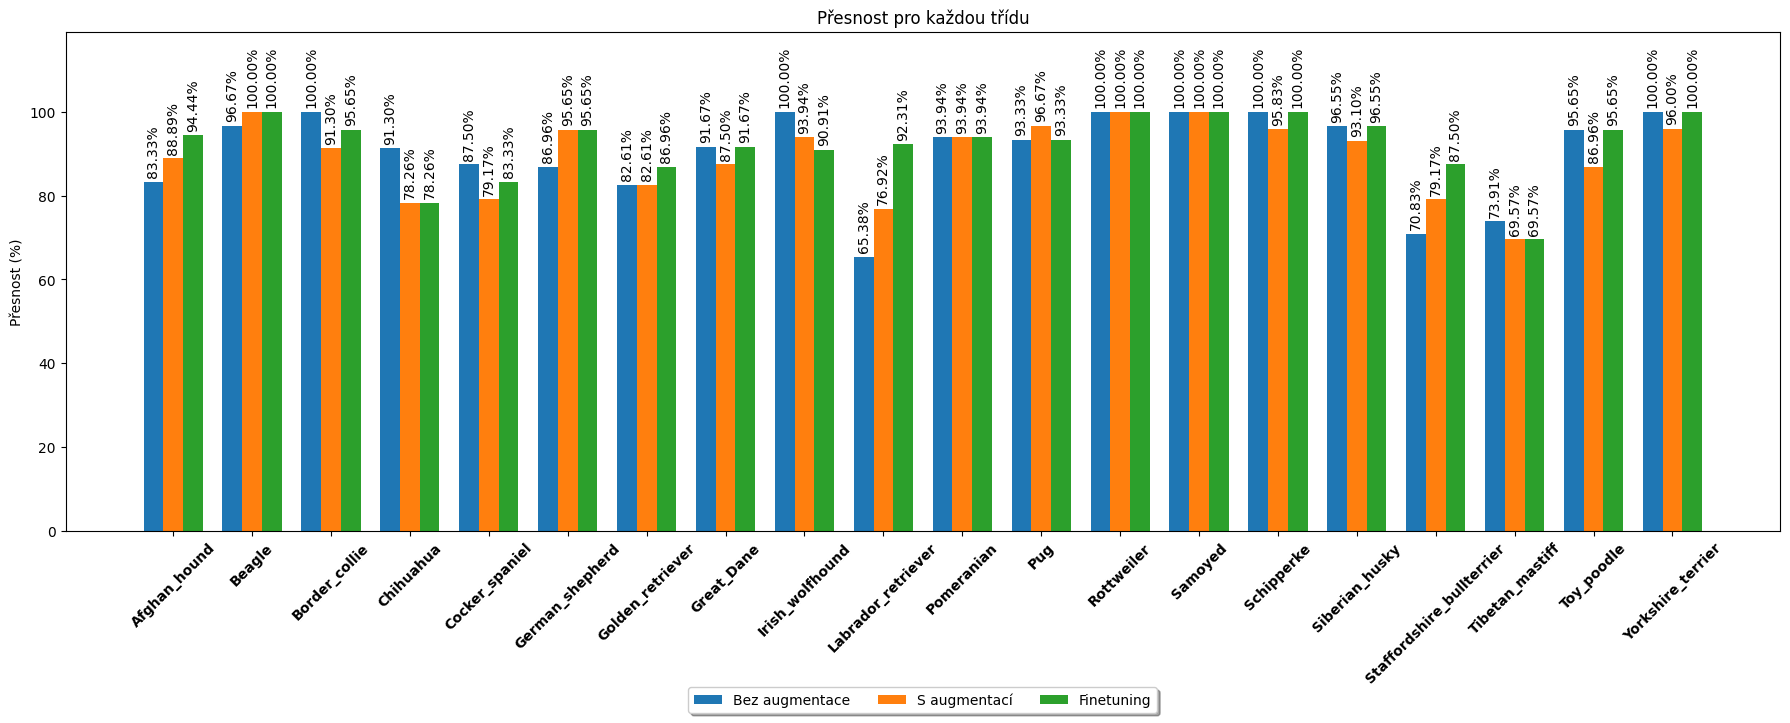

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

predictions1 = model1_loaded.predict(test_generator, steps=np.ceil(test_generator.samples / test_generator.batch_size))
predictions2 = model2_loaded.predict(test_generator, steps=np.ceil(test_generator.samples / test_generator.batch_size))
predictions3 = model3_loaded.predict(test_generator, steps=np.ceil(test_generator.samples / test_generator.batch_size))

y_pred1 = np.argmax(predictions1, axis=1)
y_pred2 = np.argmax(predictions2, axis=1)
y_pred3 = np.argmax(predictions3, axis=1)

y_true = test_generator.classes

cm1 = confusion_matrix(y_true, y_pred1)
cm2 = confusion_matrix(y_true, y_pred2)
cm3 = confusion_matrix(y_true, y_pred3)

accuracy1 = 100 * np.diag(cm1) / np.sum(cm1, axis=1)
accuracy2 = 100 * np.diag(cm2) / np.sum(cm2, axis=1)
accuracy3 = 100 * np.diag(cm3) / np.sum(cm3, axis=1)

class_names = list(test_generator.class_indices.keys())

x = np.arange(len(class_names))
width = 0.25

fig, ax = plt.subplots(figsize=(18, 8))
rects1 = ax.bar(x - width, accuracy1, width, label='Bez augmentace')
rects2 = ax.bar(x, accuracy2, width, label='S augmentací')
rects3 = ax.bar(x + width, accuracy3, width, label='Finetuning')

ax.set_ylabel('Přesnost (%)')
ax.set_title('Přesnost pro každou třídu')
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45, fontweight='bold')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=3)
ax.set_ylim(0, max(max(accuracy1), max(accuracy2), max(accuracy3)) + 19)
def autolabel(rects):
    """Připojí popisek nad každý sloupec zobrazující jeho výšku."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation=90)
fig.subplots_adjust(top=1, bottom=0.1)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()


In [ ]:
import os

model_path = '/content/drive/My Drive/GAP2D/'

if not os.path.exists(model_path):
    os.makedirs(model_path)


model1_loaded.save(model_path + 'GAPmodel1_loaded.keras', save_format='tf')
model2_loaded.save(model_path + 'GAPmodel2_loaded.keras', save_format='tf')
model3_loaded.save(model_path + 'GAPmodel3_loaded.keras', save_format='tf')

In [ ]:
# Model 1
train_loss, train_accuracy = model1_loaded.evaluate(train_generator)
print(f"Trénovací ztráta: {train_loss}, Trénovací přesnost: {train_accuracy}")

valid_loss, valid_accuracy = model1_loaded.evaluate(validation_generator)
print(f"Validační ztráta: {valid_loss}, Validační přesnost: {valid_accuracy}")

test_loss, test_accuracy = model1_loaded.evaluate(test_generator)
print(f"Testovací ztráta: {test_loss}, Testovací přesnost: {test_accuracy}")

# Model 2
train_loss2, train_accuracy2 = model2_loaded.evaluate(train_generator)
print(f"Trénovací ztráta modelu 2: {train_loss2}, Trénovací přesnost modelu 2: {train_accuracy2}")

valid_loss2, valid_accuracy2 = model2_loaded.evaluate(validation_generator)
print(f"Validační ztráta modelu 2: {valid_loss2}, Validační přesnost modelu 2: {valid_accuracy2}")

test_loss2, test_accuracy2 = model2_loaded.evaluate(test_generator)
print(f"Testovací ztráta modelu 2: {test_loss2}, Testovací přesnost modelu 2: {test_accuracy2}")

# Model 3
train_loss3, train_accuracy3 = model3_loaded.evaluate(train_generator)
print(f"Trénovací ztráta modelu 3: {train_loss3}, Trénovací přesnost modelu 3: {train_accuracy3}")

valid_loss3, valid_accuracy3 = model3_loaded.evaluate(validation_generator)
print(f"Validační ztráta modelu 3: {valid_loss3}, Validační přesnost modelu 3: {valid_accuracy3}")

test_loss3, test_accuracy3 = model3_loaded.evaluate(test_generator)
print(f"Testovací ztráta modelu 3: {test_loss3}, Testovací přesnost modelu 3: {test_accuracy3}")

77/77 [==============================] - 35s 440ms/step - loss: 0.3919 - accuracy: 0.9105
Trénovací ztráta: 0.3918747901916504, Trénovací přesnost: 0.9105090498924255
17/17 [==============================] - 4s 209ms/step - loss: 0.4040 - accuracy: 0.8908
Validační ztráta: 0.40398159623146057, Validační přesnost: 0.8907721042633057
17/17 [==============================] - 2s 122ms/step - loss: 0.3816 - accuracy: 0.9079
Testovací ztráta: 0.38158103823661804, Testovací přesnost: 0.9078947305679321
77/77 [==============================] - 35s 447ms/step - loss: 0.2715 - accuracy: 0.9319
Trénovací ztráta modelu 2: 0.2715184986591339, Trénovací přesnost modelu 2: 0.9318554997444153
17/17 [==============================] - 2s 124ms/step - loss: 0.3272 - accuracy: 0.9096
Validační ztráta modelu 2: 0.327157586812973, Validační přesnost modelu 2: 0.909604549407959
17/17 [==============================] - 2s 117ms/step - loss: 0.3174 - accuracy: 0.8985
Testovací ztráta modelu 2: 0.31742638349533

In [ ]:
import pandas as pd

data = {
    'Model': ['Bez Augmentace', 'S Augmentací', 'mensiLR'],
    'Trénovací Ztráta': [train_loss, train_loss2, train_loss3],
    'Trénovací Přesnost': [train_accuracy, train_accuracy2, train_accuracy3],
    'Validační Ztráta': [valid_loss, valid_loss2, valid_loss3],
    'Validační Přesnost': [valid_accuracy, valid_accuracy2, valid_accuracy3],
    'Testovací Ztráta': [test_loss, test_loss2, test_loss3],
    'Testovací Přesnost': [test_accuracy, test_accuracy2, test_accuracy3]
}

results_df = pd.DataFrame(data)

print(results_df)

            Model  Trénovací Ztráta  Trénovací Přesnost  Validační Ztráta  \
0  Bez Augmentace          0.391875            0.910509          0.403982   
1    S Augmentací          0.271518            0.931855          0.327158   
2         mensiLR          0.115146            0.970443          0.231672   

   Validační Přesnost  Testovací Ztráta  Testovací Přesnost  
0            0.890772          0.381581            0.907895  
1            0.909605          0.317426            0.898496  
2            0.932203          0.233241            0.926692  


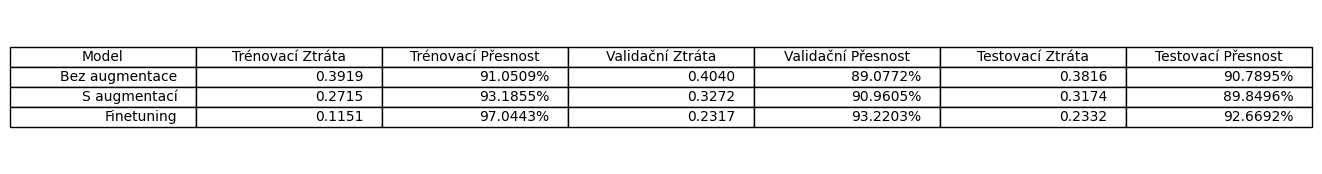

In [ ]:
import matplotlib.pyplot as plt

data = [
    ["Bez augmentace", format(train_loss, ".4f"), format(train_accuracy, ".4%"), format(valid_loss, ".4f"), format(valid_accuracy, ".4%"), format(test_loss, ".4f"), format(test_accuracy, ".4%")],
    ["S augmentací", format(train_loss2, ".4f"), format(train_accuracy2, ".4%"), format(valid_loss2, ".4f"), format(valid_accuracy2, ".4%"), format(test_loss2, ".4f"), format(test_accuracy2, ".4%")],
    ["Finetuning", format(train_loss3, ".4f"), format(train_accuracy3, ".4%"), format(valid_loss3, ".4f"), format(valid_accuracy3, ".4%"), format(test_loss3, ".4f"), format(test_accuracy3, ".4%")]
]

columns = ('Model', 'Trénovací Ztráta', 'Trénovací Přesnost', 'Validační Ztráta', 'Validační Přesnost', 'Testovací Ztráta', 'Testovací Přesnost')

fig, ax = plt.subplots(figsize=(14, 2))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=data, colLabels=columns, loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.show()